In [50]:
import pandas as pd

In [51]:
import seaborn as sns

In [52]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른 (그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [53]:
# 컬럼의 이름 변경
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
origin_data = tips.copy()

In [55]:
# 소수점 첫째 자리에서 반올림
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3
240,27.2,2.0,Female,Yes,Sat,Dinner,2
241,22.7,2.0,Male,Yes,Sat,Dinner,2
242,17.8,1.8,Male,No,Sat,Dinner,2


In [56]:
# 팁의 비율 파생변수 생성
# 팁 / 총금액 * 100
tips['팁의 비율'] = tips['팁'] / tips['총금액'] * 100
tips

,총금액,팁,성별,흡연여부,요일,시간,인원,팁의 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146
...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.344828
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.352941
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.810573
242,17.8,1.8,Male,No,Sat,Dinner,2,10.112360


In [57]:
# 그룹화
group_data = tips[['인원', '성별', '팁의 비율']].groupby(['인원', '성별']).mean()

In [58]:
# 바그래프 시각화
import matplotlib.pyplot as plt

In [59]:
import platform

In [60]:
# window에서 matplotlib 폰트 설정 변경
# plt.rc('font', family = 'Malgun Gothic')

# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin" :  # Mac 인 경우
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')

In [61]:
# 인덱스 해보면, 멀티인덱스로 나온다
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

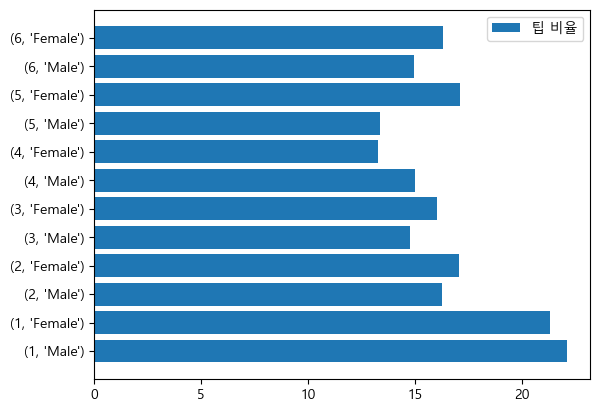

In [65]:
x = list(range(0, len(group_data.index), 1))
y = group_data['팁의 비율']

# print(x)
# print(y)

plt.barh(x, y, label="팁 비율")
plt.yticks(x, group_data.index)
plt.legend()
plt.show()

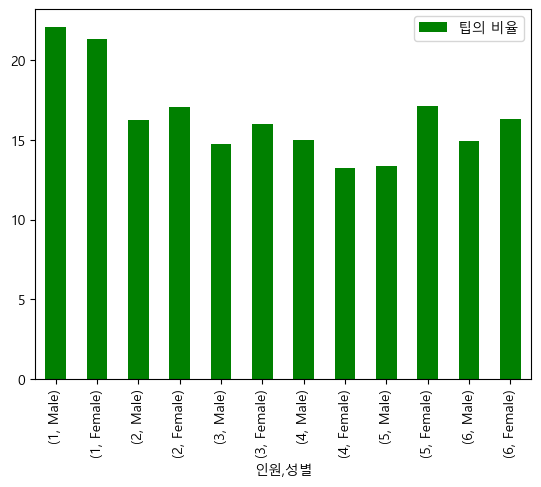

In [63]:
# 소연 풀이
group_data.plot.bar(color = 'g')
plt.show()

In [94]:
# 남자의 데이터프레임
# 여자의 데이터프레임 으로 나눈다.

# 비어있는 데이터프레임 생성
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index :
    if i[1] == 'Male' :
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else :
        female_data = pd.concat([female_data, group_data.loc[[i]]])


In [98]:
group_data

팁의 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [71]:
# ------------------------------------------------------------------------------------
# []하나만 있으면 값이 나온다. (스리즈)
group_data.loc[(1, "Male")]

팁의 비율    22.093023
Name: (1, Male), dtype: float64

In [72]:
# [[]] 있으면 값이 하나여도 데이터프레임으로 나온다. (리스트는 값이 추가될지도 모르니까)
group_data.loc[[(1, "Male")]]
# -------------------------------------------------------------------------------------

,,팁의 비율
인원,성별,
1,Male,22.093023


In [76]:
# ex)-------------------------------------------------
value = [[1,2,3], [4,5,6]]

df = pd.DataFrame(value, columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6


In [78]:
df.loc[0]

a    1
b    2
c    3
Name: 0, dtype: int64

In [79]:
df.loc[[0]]
# -------------------------------------------------------

,a,b,c
0,1,2,3


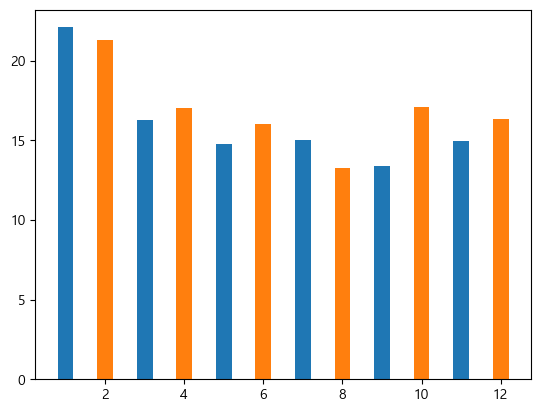

In [96]:
# 다시 [73]에 이어서
x = list(range(1, (len(male_data))*2, 2))         # 기본값이므로, 0,1 생략 가능
y = male_data['팁의 비율']
x2 = list(range(2, (len(female_data)+1)*2, 2))
y2 = female_data['팁의 비율']

plt.bar(x, y, width=0.4)
plt.bar(x2, y2, width=0.4)

plt.show()

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

        -  groupby 복잡하니까 pivot으로 하면 간편하다

In [92]:
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    values = ['팁의 비율'],             # []없으면 인덱스 형태로 나오지 않는다
    aggfunc = 'mean'
)

<Axes: xlabel='인원'>

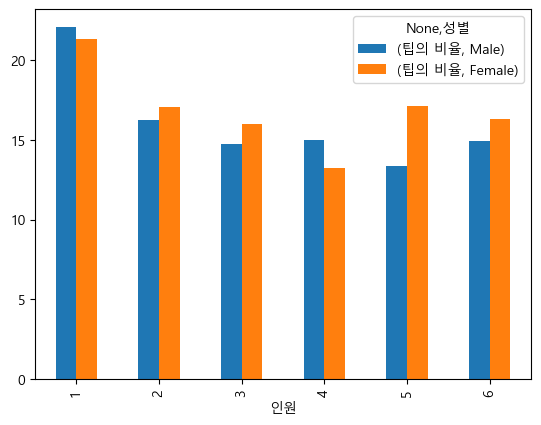

In [93]:
pivot_data.plot.bar()